#For more info or reporting issues contact nargeschinichian[at]gmail[dot]com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
#All subjects
lis = ["id1","id2","idn"]
print(len(lis))

331


In [ ]:
for sub in lis:
    Winner = np.load("Needed_Address")
    contingency_cube = np.zeros((246,246,113))
    for t in range(0,113):
        for i in range(0,246):
            for j in range(0,246):
                if Winner[t,i] == Winner[t,j]:
                    contingency_cube[i,j,t]= 1
                    contingency_cube[j,i,t]= 1
    print("sub %s in being processed"%sub)
    np.save("Needed_Address",contingency_cube)

In [ ]:
#We want to seperate the blocks now:
# Windows (above or more than 12 shares in) 0-back:
# 0-1-2-3/27-28-29-30-31-32-33/57-58-59-60-61-62-63/87-88-89-90-91-92-93/
# Windows (above or more than 12 shares in) 2-back:
# 12-13-14-15-16-17-18/42-43-44-45-46-47-48/72-73-74-75-76-77-78/102-103-104-105-106-107-108
ZeroBBlocksWindows = [0,1,2,3,27,28,29,30,31,32,33,57,58,59,60,61,62,63,87,88,89,90,91,92,93]
TwoBBlocksWindows = [12,13,14,15,16,17,18,42,43,44,45,46,47,48,72,73,74,75,76,77,78,102,103,104,105,106,107,108]
print(len(ZeroBBlocksWindows))
print(len(TwoBBlocksWindows))


In [ ]:
for sub in lis:
    print("subject %s in being processed"%sub)
    contingency_cube = np.load("Needed_Address")
    contingency_cube_zeroback = contingency_cube[:,:,ZeroBBlocksWindows]
    contingency_cube_twoback = contingency_cube[:,:,TwoBBlocksWindows]
    T_zeroback = np.mean(contingency_cube_zeroback,axis = 2)
    T_twoback = np.mean(contingency_cube_twoback,axis = 2)
    for i in range(0,246):
        T_zeroback[i,i]=0
        T_twoback[i,i]=0
    np.save("Needed_Address",T_zeroback)
    np.save("Needed_Address",T_twoback)


In [4]:
#Finding the template affiliation of areas
Fiftn_Affil = scipy.io.loadmat("Needed_Address",)
PyMatrix = np.array(Fiftn_Affil["a"])
#collecting indices:
Module1_indices = np.where(PyMatrix == 1)[0]
Module2_indices = np.where(PyMatrix == 2)[0]
Module3_indices = np.where(PyMatrix == 3)[0]
Module4_indices = np.where(PyMatrix == 4)[0]
Module5_indices = np.where(PyMatrix == 5)[0]
Module6_indices = np.where(PyMatrix == 6)[0]
Module7_indices = np.where(PyMatrix == 7)[0]
Module8_indices = np.where(PyMatrix == 8)[0]
Module9_indices = np.where(PyMatrix == 9)[0]
Module10_indices = np.where(PyMatrix == 10)[0]
Module11_indices = np.where(PyMatrix == 11)[0]
Module12_indices = np.where(PyMatrix == 12)[0]
Module13_indices = np.where(PyMatrix == 13)[0]
Module14_indices = np.where(PyMatrix == 14)[0]
Module15_indices = np.where(PyMatrix == 15)[0]
all_indices = [Module1_indices,Module2_indices,Module3_indices,Module4_indices,Module5_indices,Module6_indices,Module7_indices,Module8_indices,
Module9_indices,Module10_indices,Module11_indices,Module12_indices,Module13_indices,Module14_indices,Module15_indices]

In [5]:
module_size = []
for i in range(0,15):
    module_size.append(len(all_indices[i]))
print(module_size)

label_locations = []
for i in range(0,15):
    label_locations.append(np.sum(module_size[:i])+ module_size[i]/2)
print(label_locations)

[25, 10, 20, 26, 14, 19, 8, 14, 5, 6, 13, 14, 19, 23, 30]
[12.5, 30.0, 45.0, 68.0, 88.0, 104.5, 118.0, 129.0, 138.5, 144.0, 153.5, 167.0, 183.5, 204.5, 231.0]


In [59]:
np.sum(module_size[:0+1])

25

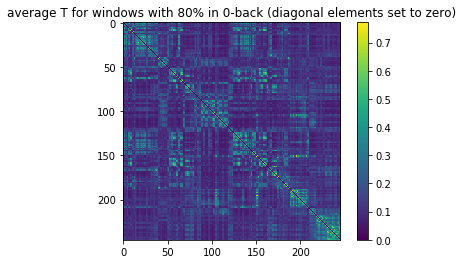

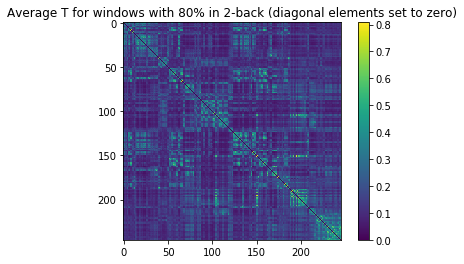

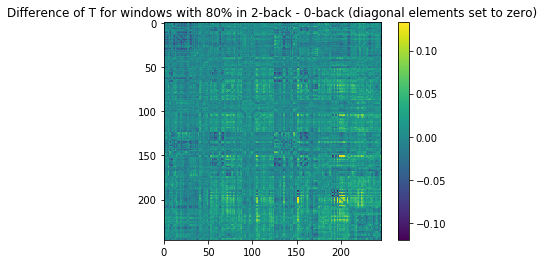

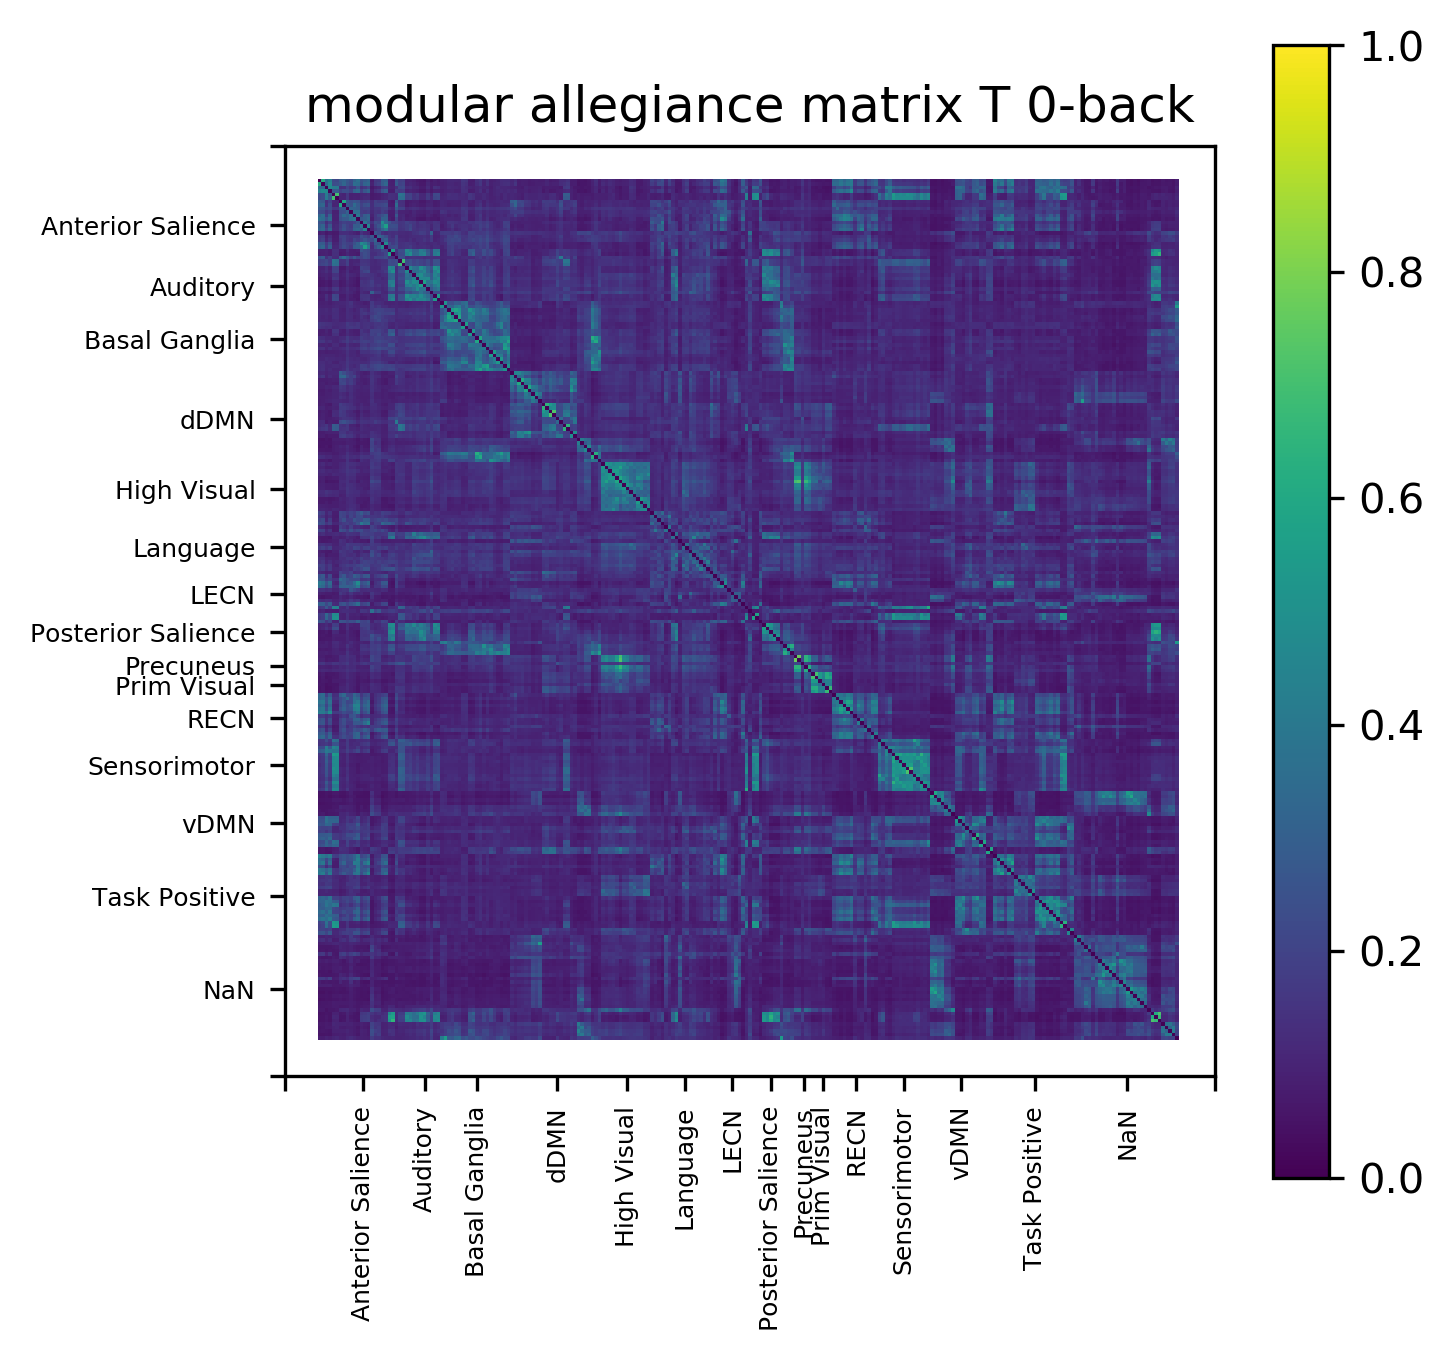

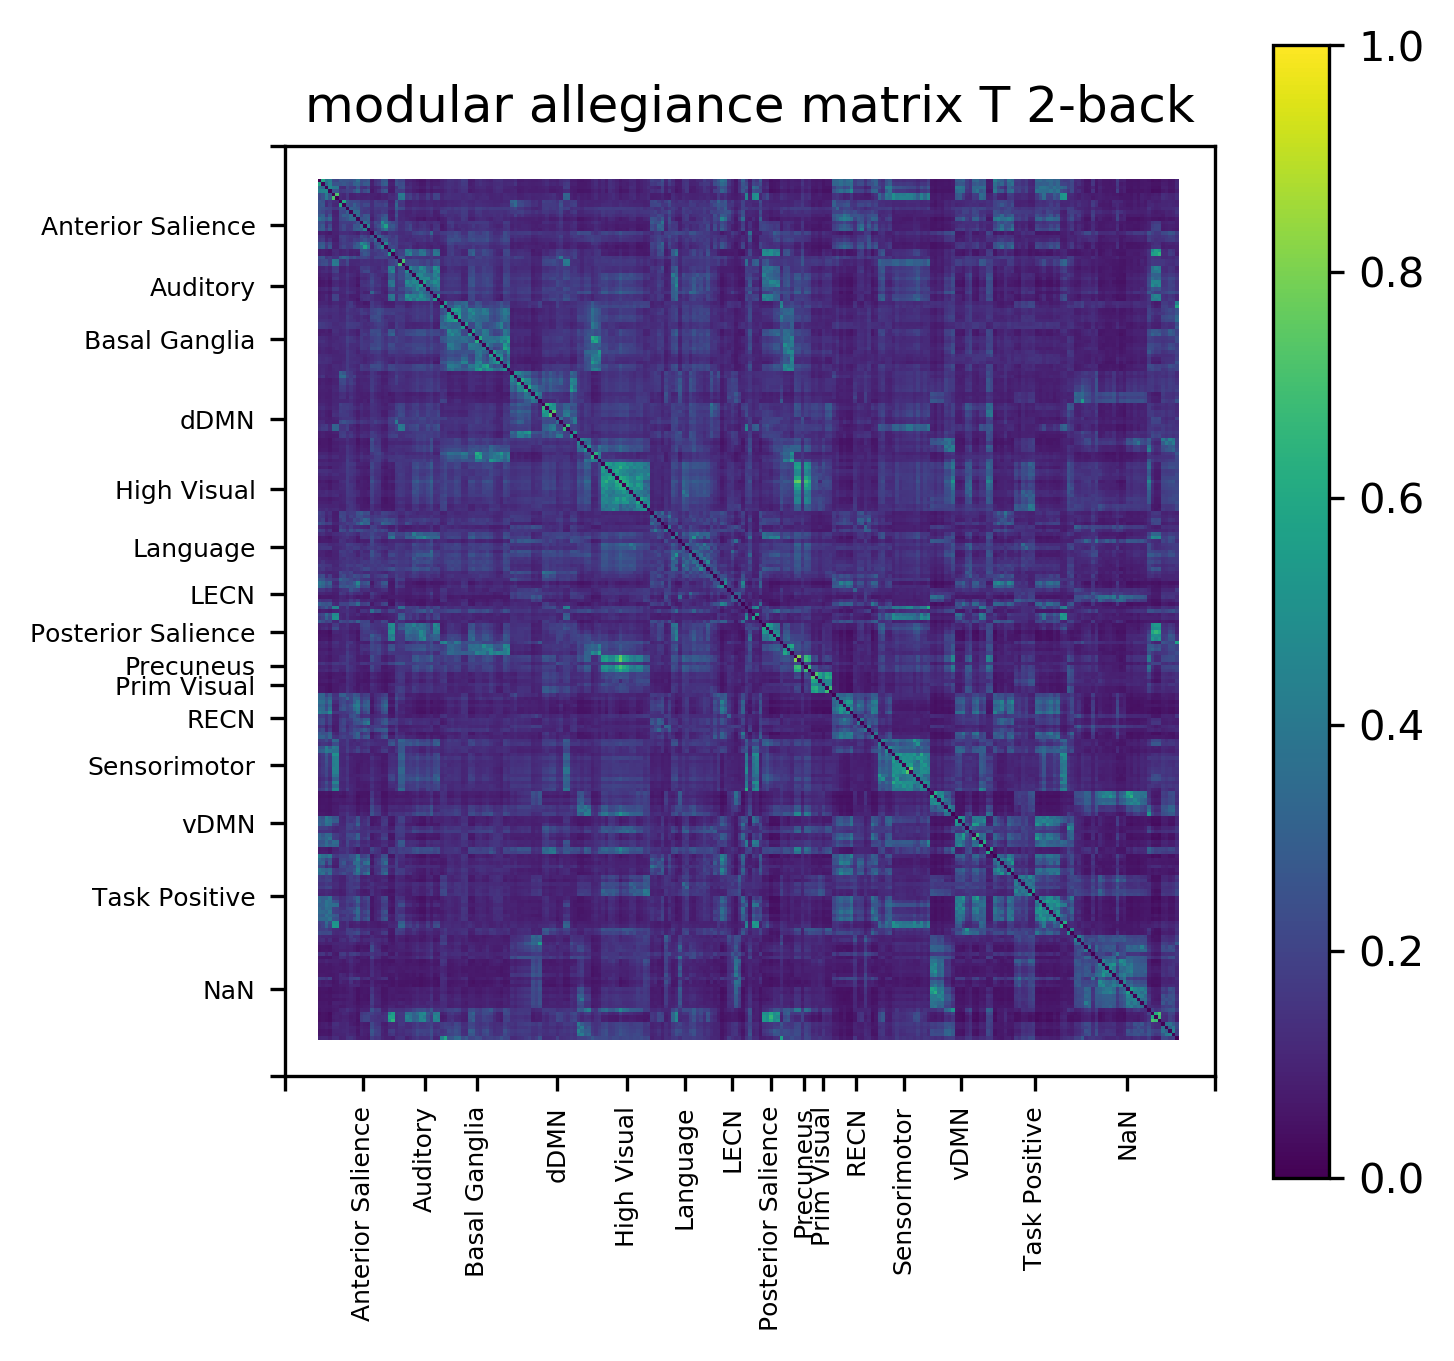

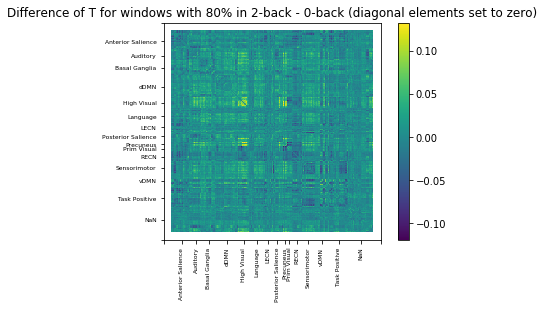

In [35]:
#averaging all the Ts for all the subjects:
Avg_T_zeroback = np.zeros((246,246))
Avg_T_twoback = np.zeros((246,246))

module_size = []
for i in range(0,15):
    module_size.append(len(all_indices[i]))


label_locations = [-10]
for i in range(0,15):
    label_locations.append(np.sum(module_size[:i])+ module_size[i]/2)
label_locations.append(label_locations[-1]+25)

for sub in lis:
    #print("subject %s in being processed"%sub)
    T_zeroback = np.load("Needed_Address")
    T_twoback = np.load("Needed_Address")
    Avg_T_zeroback = Avg_T_zeroback + T_zeroback
    Avg_T_twoback = Avg_T_twoback + T_twoback
Avg_T_zeroback = Avg_T_zeroback/331
Avg_T_twoback = Avg_T_twoback/331

plt.title("average T for windows with 80% in 0-back (diagonal elements set to zero)")
plt.imshow(Avg_T_zeroback)
plt.colorbar()
plt.figure()
plt.title("Average T for windows with 80% in 2-back (diagonal elements set to zero)")
plt.imshow(Avg_T_twoback)
plt.colorbar()
plt.figure()
plt.title("Difference of T for windows with 80% in 2-back - 0-back (diagonal elements set to zero)")
plt.imshow(Avg_T_twoback - Avg_T_zeroback)
plt.colorbar()


#elements sorted to have the matrices more blocked.
Sorted_nodes = np.concatenate([Module1_indices,Module2_indices,Module3_indices,Module4_indices,Module5_indices,Module6_indices,Module7_indices,Module8_indices,
Module9_indices,Module10_indices,Module11_indices,Module12_indices,Module13_indices,Module14_indices,Module15_indices])
Sorted_nodes = list(Sorted_nodes)


Sorted_T_zeroback = np.zeros((246,246))
Sorted_T_twoback = np.zeros((246,246))
for ii in Sorted_nodes:
    for jj in Sorted_nodes:
        Sorted_T_zeroback[Sorted_nodes.index(ii),Sorted_nodes.index(jj)] = Avg_T_zeroback[ii,jj]
        Sorted_T_twoback[Sorted_nodes.index(ii),Sorted_nodes.index(jj)] = Avg_T_twoback[ii,jj]

fig, ax = plt.subplots(1,1,figsize=(5,5),dpi=300)
img = ax.imshow(Sorted_T_zeroback,vmin=0, vmax=1)
label_list = ["","Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive","NaN",""]
ax.set_xticks(label_locations)
ax.set_xticklabels(label_list,rotation=90)
ax.tick_params(axis='both', which='major', labelsize=6)
ax.set_yticks(label_locations)
ax.set_yticklabels(label_list)
ax.set_title("modular allegiance matrix T 0-back")
#average T for windows with 80% in 0-back (diagonal elements set to zero)
fig.colorbar(img)
fig.savefig("Needed_Address",format='jpg',bbox_inches='tight')


fig, ax = plt.subplots(1,1,figsize=(5,5),dpi=300)
img = ax.imshow(Sorted_T_twoback,vmin=0, vmax=1)
label_list = ["","Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive","NaN",""]
ax.set_xticks(label_locations)
ax.set_xticklabels(label_list,rotation=90)
ax.tick_params(axis='both', which='major', labelsize=6)
ax.set_yticks(label_locations)
ax.set_yticklabels(label_list)
ax.set_title("modular allegiance matrix T 2-back")
#average T for windows with 80% in 2-back (diagonal elements set to zero)
fig.colorbar(img)
fig.savefig("Needed_Address",format='jpg',bbox_inches='tight')

fig, ax = plt.subplots(1,1)
img = ax.imshow(Sorted_T_twoback-Sorted_T_zeroback)
label_list = ["","Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive","NaN",""]
ax.set_xticks(label_locations)
ax.set_xticklabels(label_list,rotation=90)
ax.tick_params(axis='both', which='major', labelsize=6)
ax.set_yticks(label_locations)
ax.set_yticklabels(label_list)
ax.set_title("Difference of T for windows with 80% in 2-back - 0-back (diagonal elements set to zero)")
fig.colorbar(img)
fig.savefig("Needed_Address",format='jpg',bbox_inches='tight')


Text(0.5, 1.0, 'Difference in R for 2back-0back')

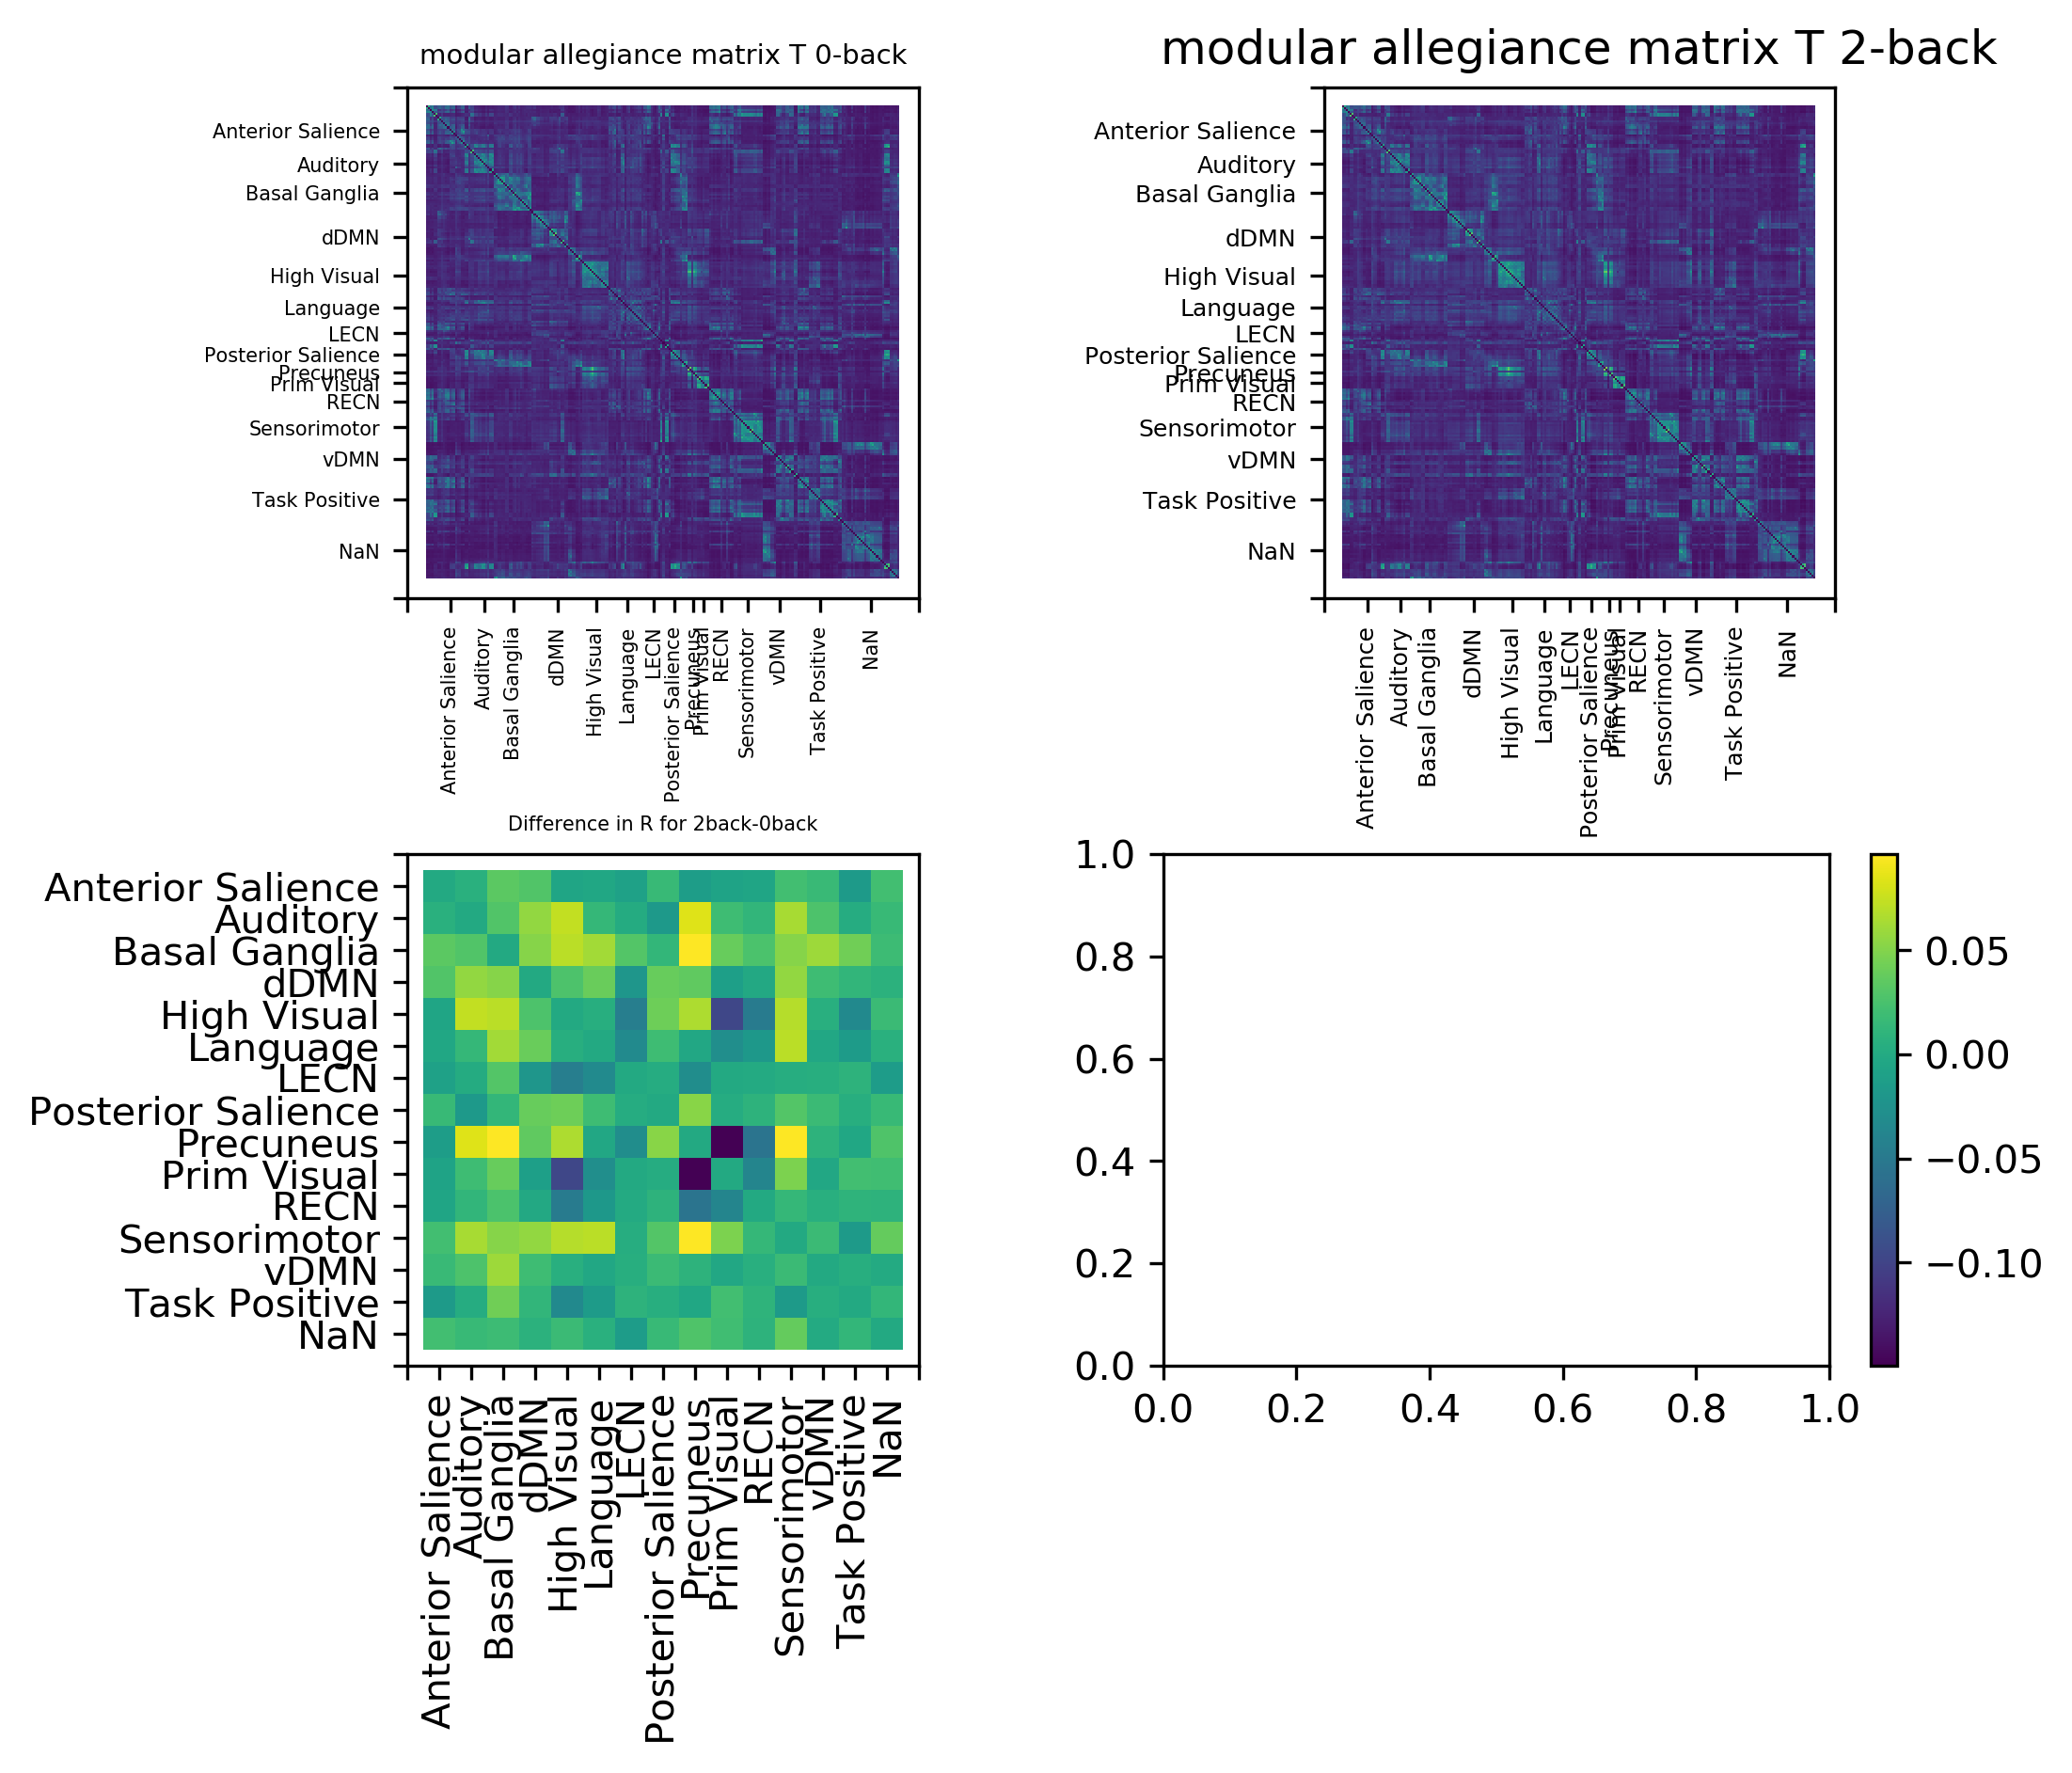

In [30]:
fig, ax = plt.subplots(2,2,figsize=(8,6),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.5)
ax[0,0].imshow(Sorted_T_zeroback,vmin=0, vmax=1)
label_list = ["","Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive","NaN",""]
ax[0,0].set_xticks(label_locations)
ax[0,0].set_xticklabels(label_list,rotation=90)
ax[0,0].tick_params(axis='both', which='major',labelsize=5)
ax[0,0].set_yticks(label_locations)
ax[0,0].set_yticklabels(label_list)
ax[0,0].set_title("modular allegiance matrix T 0-back",fontsize = 7)
#average T for windows with 80% in 0-back (diagonal elements set to zero)
#fig.colorbar(img)
#fig.savefig("Needed_Address",format='eps',bbox_inches='tight')


#fig, ax = plt.subplots(1,1)
ax[0,1].imshow(Sorted_T_twoback,vmin=0, vmax=1)
ax[0,1].set_xticks(label_locations)
ax[0,1].set_xticklabels(label_list,rotation=90)
ax[0,1].tick_params(axis='both', which='major', labelsize=5)
ax[0,1].set_yticks(label_locations)
ax[0,1].set_yticklabels(label_list)
ax[0,1].set_title("modular allegiance matrix T 2-back")
#average T for windows with 80% in 2-back (diagonal elements set to zero)
fig.colorbar(img)
#fig.savefig("Needed_Address",format='eps',bbox_inches='tight')


ax[1,0].imshow(R_twoback-R_zeroback)
label_list = ["","Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive","NaN",""]
ax[1,0].set_xticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax[1,0].set_xticklabels(label_list,rotation=90)
ax[0,1].tick_params(axis='both', which='major', labelsize=6)
ax[1,0].set_yticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax[1,0].set_yticklabels(label_list)
ax[1,0].set_title("Difference in R for 2back-0back",fontsize=5)
#fig.savefig("Needed_Address",format='eps',bbox_inches='tight')



In [41]:
Sorted_nodes

array([  0,   1,   6,   7,   8,   9,  10,  11,  14,  18,  19,  20,  36,
        37,  39,  76, 164, 165, 166, 167, 172, 173, 179, 182, 183,  60,
        61,  70,  71,  72,  73,  75,  78, 156, 157, 218, 219, 220, 221,
       224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 239, 241, 242,
       243, 244, 245,   4,   5,  12,  13,  40,  41,  46,  47,  48, 152,
       153, 174, 175, 177, 178, 184, 185, 186, 187, 214, 215, 216, 217,
       236, 237, 240, 104, 105, 188, 189, 192, 195, 198, 199, 200, 201,
       202, 203, 204, 205,  32,  34,  35,  38,  42,  50,  74,  79,  82,
        84,  85,  86,  87, 120, 121, 122, 123, 142, 143,   2,  16,  22,
        26,  80,  94,  98, 136,  65,  77, 130, 131, 140, 144, 145, 162,
       168, 169, 222, 234, 235, 238, 150, 151, 176, 206, 207, 190, 191,
       193, 194, 196, 197,   3,  15,  17,  21,  23,  25,  27,  31,  33,
        43,  51, 137, 141,  52,  53,  54,  55,  56,  57,  58,  59,  66,
        67, 154, 155, 160, 161,  64, 102, 103, 110, 111, 112, 11

In [41]:
print(all_indices)

[array([  0,   1,   6,   7,   8,   9,  10,  11,  14,  18,  19,  20,  36,
        37,  39,  76, 164, 165, 166, 167, 172, 173, 179, 182, 183]), array([ 60,  61,  70,  71,  72,  73,  75,  78, 156, 157]), array([218, 219, 220, 221, 224, 225, 226, 227, 228, 229, 230, 231, 232,
       233, 239, 241, 242, 243, 244, 245]), array([  4,   5,  12,  13,  40,  41,  46,  47,  48, 152, 153, 174, 175,
       177, 178, 184, 185, 186, 187, 214, 215, 216, 217, 236, 237, 240]), array([104, 105, 188, 189, 192, 195, 198, 199, 200, 201, 202, 203, 204,
       205]), array([ 32,  34,  35,  38,  42,  50,  74,  79,  82,  84,  85,  86,  87,
       120, 121, 122, 123, 142, 143]), array([  2,  16,  22,  26,  80,  94,  98, 136]), array([ 65,  77, 130, 131, 140, 144, 145, 162, 168, 169, 222, 234, 235,
       238]), array([150, 151, 176, 206, 207]), array([190, 191, 193, 194, 196, 197]), array([  3,  15,  17,  21,  23,  25,  27,  31,  33,  43,  51, 137, 141]), array([ 52,  53,  54,  55,  56,  57,  58,  59,  66,  67, 1

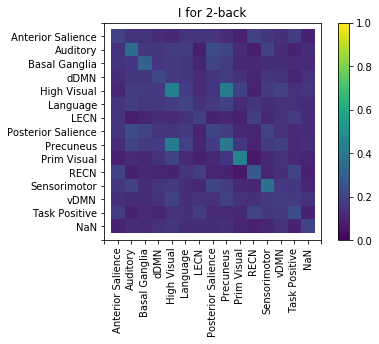

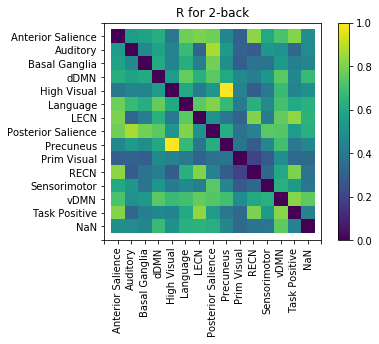

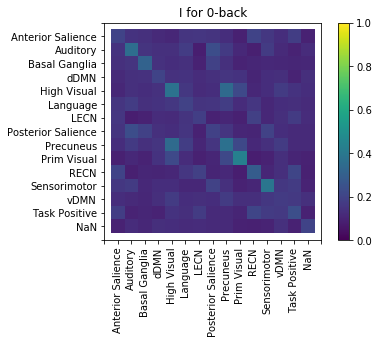

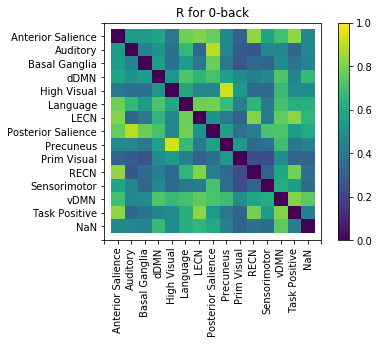

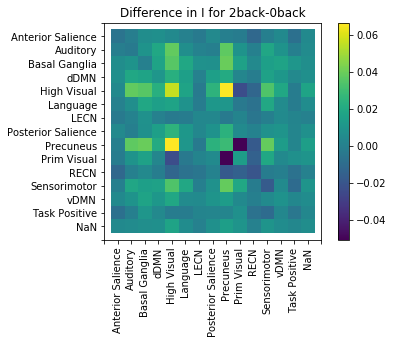

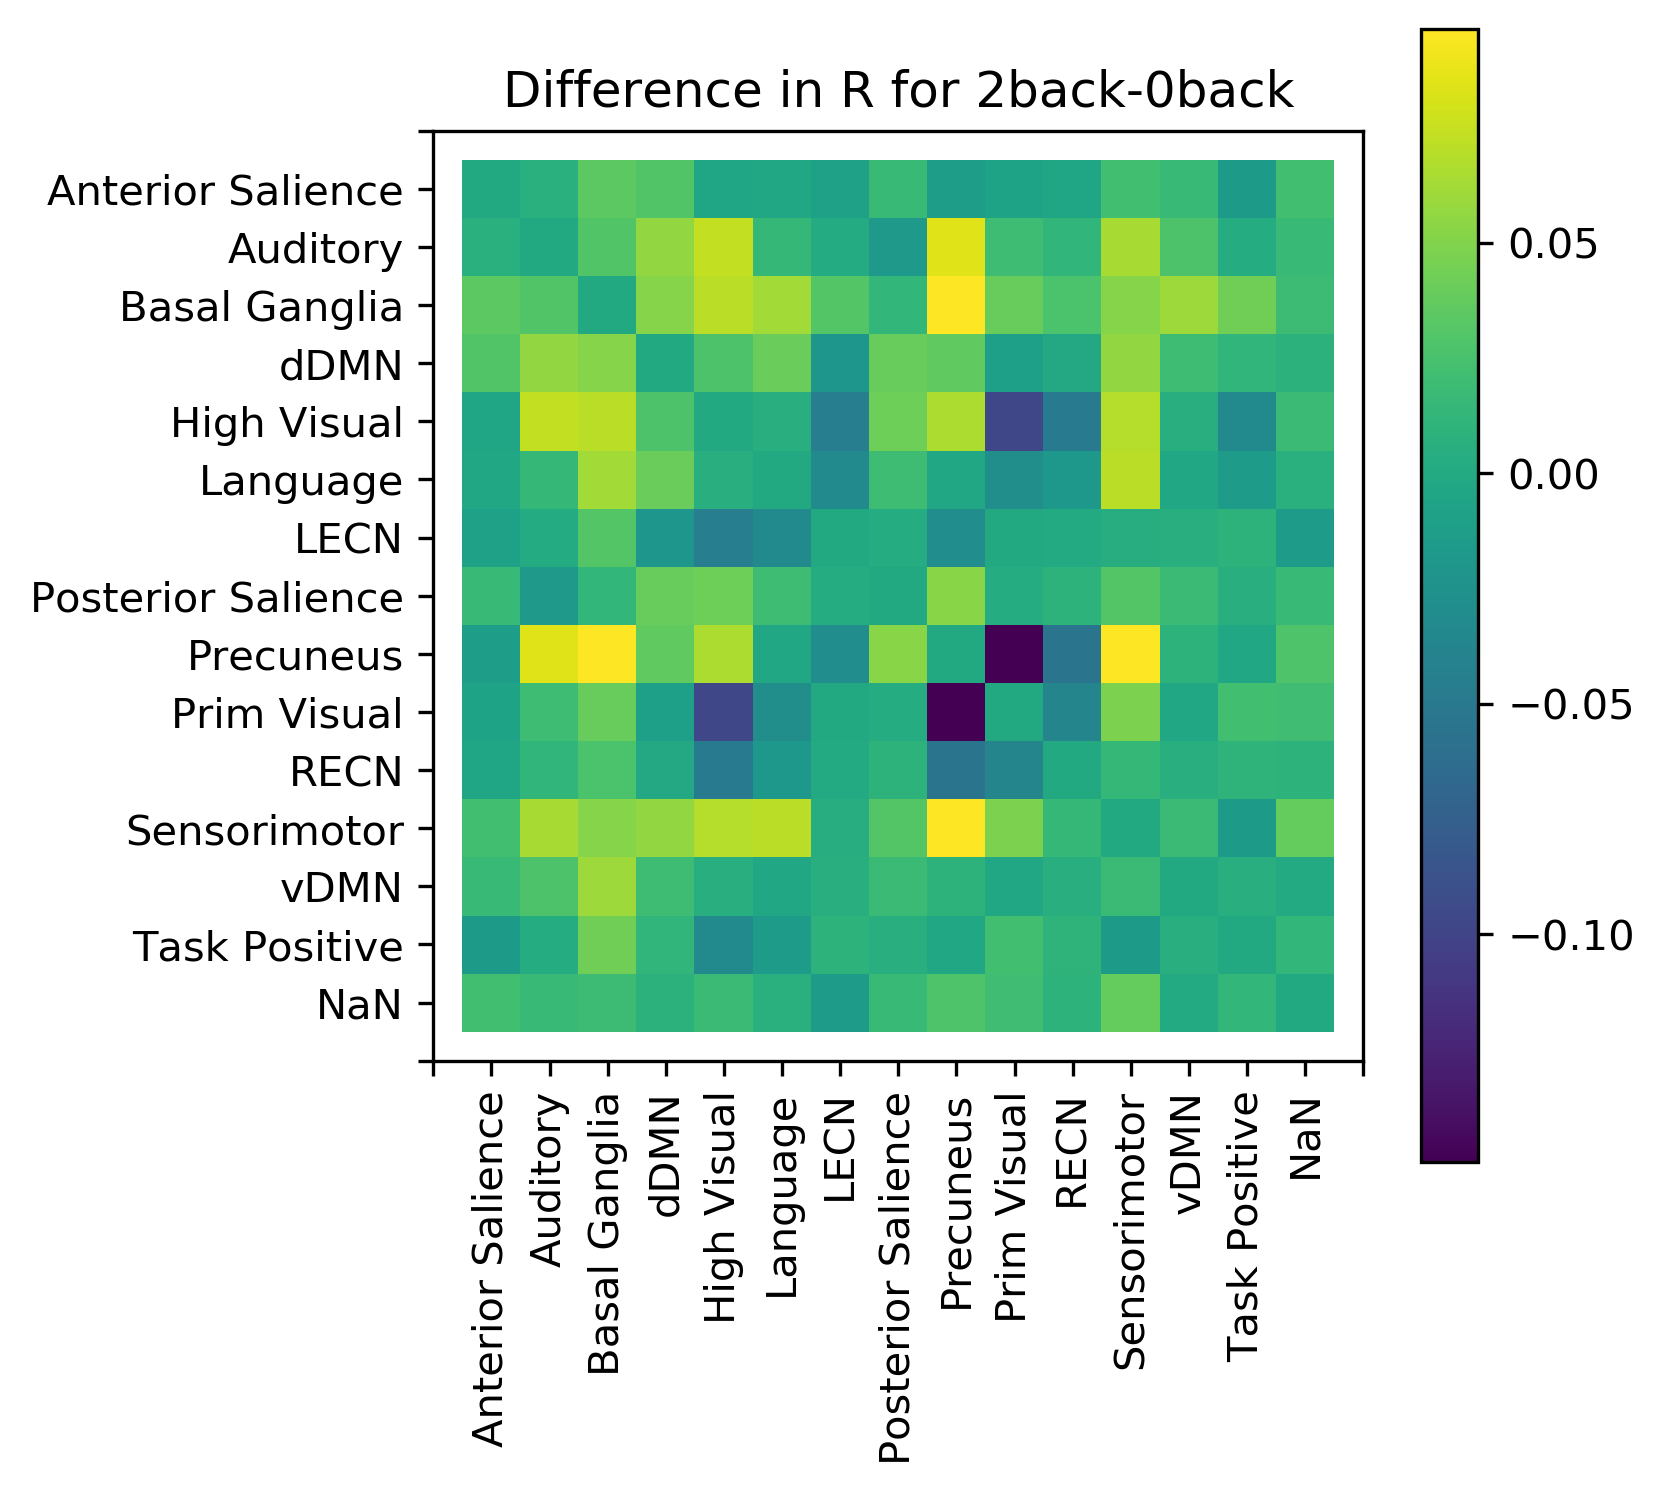

In [37]:
#Now we want to make "Integration" matrix as introduced in Braun et al 2015:
I_twoback = np.zeros((15,15))
I_zeroback = np.zeros((15,15))
for k in range(0,15):
    k_nodes = all_indices[k]
    for l in range(0,15):
        l_nodes = all_indices[l]
        for kk in k_nodes:
            for ll in l_nodes:
                I_twoback[k,l] = I_twoback[k,l] + Avg_T_twoback[kk,ll]
                I_zeroback[k,l] = I_zeroback[k,l] + Avg_T_zeroback[kk,ll]
for k in range(0,15):
    k_nodes = all_indices[k]
    for l in range(0,15):
        l_nodes = all_indices[l]
        I_twoback[k,l] = I_twoback[k,l]/(len(k_nodes)*len(l_nodes))
        I_zeroback[k,l] = I_zeroback[k,l]/(len(k_nodes)*len(l_nodes))
# for i in range(0,15):
#     I_twoback[i,i]= 0
#     I_zeroback[i,i]= 0
#Now we calculate the R matrix, which is I matrix normalized  by the internal I of modules:
R_twoback = np.zeros((15,15))
R_zeroback = np.zeros((15,15))
for k in range(0,15):
    for l in range(0,15):
        if k != l:
            R_twoback[k,l] = I_twoback[k,l] / np.sqrt(I_twoback[k,k] * I_twoback[l,l])
            R_zeroback[k,l] = I_zeroback[k,l] / np.sqrt(I_zeroback[k,k] * I_zeroback[l,l])

fig, ax = plt.subplots(1,1)
img = ax.imshow(I_twoback,vmin=0, vmax=1)
label_list = ["","Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive","NaN",""]
ax.set_xticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(label_list,rotation=90)
ax.set_yticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_yticklabels(label_list)
ax.set_title("I for 2-back")
fig.colorbar(img)
  
fig, ax = plt.subplots(1,1)
img = ax.imshow(R_twoback,vmin=0, vmax=1)
label_list = ["","Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive","NaN",""]
ax.set_xticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(label_list,rotation=90)
ax.set_yticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_yticklabels(label_list)
ax.set_title("R for 2-back")
fig.colorbar(img)
fig.savefig("Needed_Address",format='eps',bbox_inches='tight')


fig, ax = plt.subplots(1,1)
img = ax.imshow(I_zeroback,vmin=0, vmax=1)
label_list = ["","Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive","NaN",""]
ax.set_xticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(label_list,rotation=90)
ax.set_yticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_yticklabels(label_list)
ax.set_title("I for 0-back")
fig.colorbar(img)

fig, ax = plt.subplots(1,1)
img = ax.imshow(R_zeroback,vmin=0, vmax=1)
label_list = ["","Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive","NaN",""]
ax.set_xticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(label_list,rotation=90)
ax.set_yticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_yticklabels(label_list)
ax.set_title("R for 0-back")
fig.colorbar(img)
fig.savefig("Needed_Address",format='eps',bbox_inches='tight')


#Difference
fig, ax = plt.subplots(1,1)
img = ax.imshow(I_twoback-I_zeroback)
label_list = ["","Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive","NaN",""]
ax.set_xticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(label_list,rotation=90)
ax.set_yticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_yticklabels(label_list)
ax.set_title("Difference in I for 2back-0back")
fig.colorbar(img)

fig, ax = plt.subplots(1,1,figsize=(5,5),dpi=300)
img = ax.imshow(R_twoback-R_zeroback)
label_list = ["","Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive","NaN",""]
ax.set_xticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(label_list,rotation=90)
ax.set_yticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_yticklabels(label_list)
ax.set_title("Difference in R for 2back-0back")
fig.colorbar(img)
fig.savefig("Needed_Address",format='jpg',bbox_inches='tight')


In [104]:
np.argsort(R_twoback-R_zeroback)

array([[ 7,  2,  1,  9, 14, 13, 11, 12,  3,  0, 10,  6,  4,  8,  5],
       [13,  0,  9,  2,  6, 10, 12, 14,  7,  1, 11,  4,  5,  8,  3],
       [13, 11,  0,  1,  7, 12,  9, 14,  2, 10,  6,  4,  5,  3,  8],
       [ 6, 11,  9, 13, 12, 10, 14,  0,  3,  7,  2,  1,  5,  4,  8],
       [ 9,  5, 14,  8,  7,  4,  2, 13,  1,  6,  0, 12, 11, 10,  3],
       [ 9,  6, 14,  8,  4,  5,  7, 10,  2,  1, 13,  3,  0, 12, 11],
       [ 7,  5, 14,  9,  1,  3, 10, 12,  6,  2,  8,  0, 11, 13,  4],
       [13,  0,  6, 10,  9,  2, 14,  1, 12, 11,  4,  7,  5,  3,  8],
       [ 5,  9,  4,  8, 13, 14,  7,  6,  2,  0,  1, 10, 11, 12,  3],
       [ 5,  6,  7,  4,  1, 13,  0, 10, 14,  3, 12,  8,  2, 11,  9],
       [ 7,  9,  6, 14,  1,  3, 10,  0,  2,  5, 12, 11,  8,  4, 13],
       [ 2,  3, 13, 14,  0,  7,  9, 11,  1, 12,  6, 10,  4,  5,  8],
       [13,  1,  9,  2,  7,  6,  0,  3, 12, 11, 14, 10,  4,  5,  8],
       [ 7,  1,  2, 14, 12,  9, 11,  0,  3, 13,  8,  6,  4,  5, 10],
       [ 6,  5, 13,  7,  0, 10,  9

In [39]:
Diif = R_twoback-R_zeroback
Module_Integration = np.sum(R_twoback-R_zeroback, axis=1)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

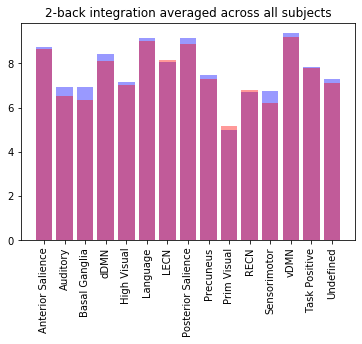

In [100]:
Names = ["Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive", "Undefined"]
plt.bar(Names,np.sum(R_twoback,axis=1),color="b",alpha =0.4)
plt.bar(Names,np.sum(R_zeroback,axis=1),color="r",alpha =0.4)
plt.title("2-back integration averaged across all subjects")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

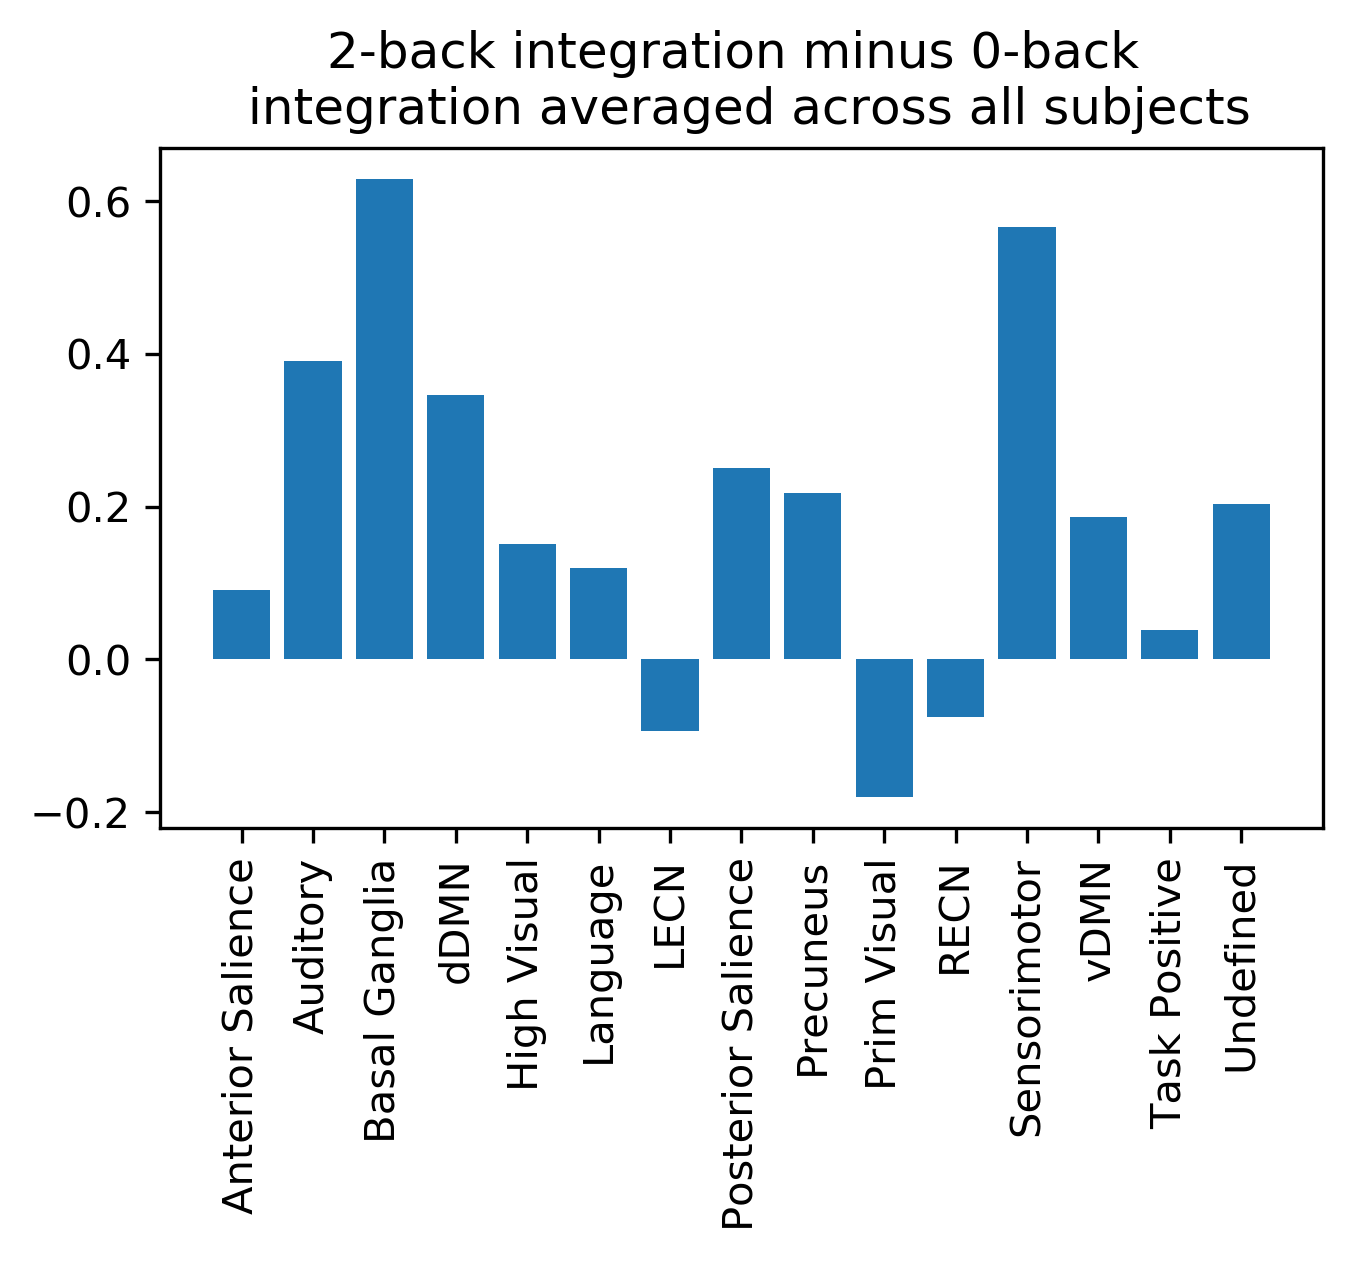

In [45]:
plt.figure(figsize=(5,3),dpi=300)
Names = ["Anterior Salience", "Auditory", "Basal Ganglia", "dDMN", "High Visual", "Language", "LECN", "Posterior Salience", "Precuneus", "Prim Visual" ,"RECN", "Sensorimotor", "vDMN", "Task Positive", "Undefined"]
plt.bar(Names,Module_Integration)
plt.title("2-back integration minus 0-back \n integration averaged across all subjects")
plt.xticks(rotation=90)

In [ ]:
#Now we make the individuals "Integration" matrix as introduced in Braun et al 2015:
for sub in lis:
    print("subject %s is being processed"%sub)
    T_twoback = np.load("Needed_Address")
    T_zeroback = np.load("Needed_Address")
    I_twoback = np.zeros((15,15))
    I_zeroback = np.zeros((15,15))
    for k in range(0,15):
        k_nodes = all_indices[k]
        for l in range(0,15):
            l_nodes = all_indices[l]
            for kk in k_nodes:
                for ll in l_nodes:
                    I_twoback[k,l] = I_twoback[k,l] + T_twoback[kk,ll]
                    I_zeroback[k,l] = I_zeroback[k,l] + T_zeroback[kk,ll]
    for k in range(0,15):
        k_nodes = all_indices[k]
        for l in range(0,15):
            l_nodes = all_indices[l]
            I_twoback[k,l] = I_twoback[k,l]/(len(k_nodes)*len(l_nodes))
            I_zeroback[k,l] = I_zeroback[k,l]/(len(k_nodes)*len(l_nodes))
    #Now we calculate the R matrix, which is I matrix normalized  by the internal I of modules:
    R_twoback = np.zeros((15,15))
    R_zeroback = np.zeros((15,15))
    for k in range(0,15):
        for l in range(0,15):
            if k != l:
                R_twoback[k,l] = I_twoback[k,l] / np.sqrt(I_twoback[k,k] * I_twoback[l,l])
                R_zeroback[k,l] = I_zeroback[k,l] / np.sqrt(I_zeroback[k,k] * I_zeroback[l,l])
    np.save("Needed_Address",R_twoback)
    np.save("Needed_Address",R_zeroback)
